In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load

In [2]:
data = pd.read_csv("data.csv", names = [f"feature_{str(x)}" for x in range(1,7)], index_col = False)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   feature_1  151 non-null    int64
 1   feature_2  151 non-null    int64
 2   feature_3  151 non-null    int64
 3   feature_4  151 non-null    int64
 4   feature_5  151 non-null    int64
 5   feature_6  151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


There are no missing values

<Axes: >

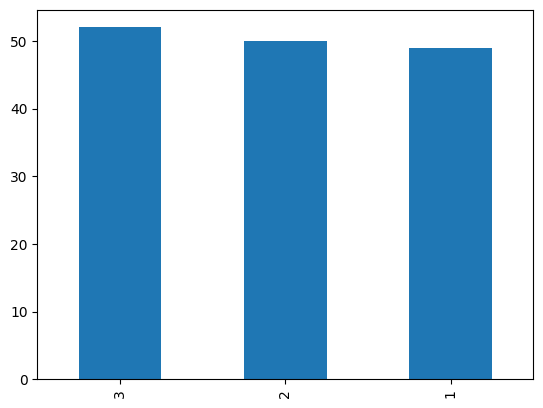

In [4]:
data.feature_6.value_counts().plot(kind="bar")

There are no class imbalance

In [6]:
X, y = data.drop(columns = ['feature_6']), data['feature_6']

scaler = StandardScaler()
X = scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


In [7]:
lr = LogisticRegression(max_iter = 1000, random_state = 69)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=69)

In [8]:
prediction = lr.predict(X_test)
print("accuracy:", accuracy_score(y_test, prediction))
print("F1 Score:", f1_score(y_test, prediction, average="macro"))
print("Precision Score:", precision_score(y_test, prediction, average="macro"))
print("Recall Score:", precision_score(y_test, prediction, average="macro"))

accuracy: 0.5806451612903226
F1 Score: 0.5361111111111111
Precision Score: 0.5446428571428571
Recall Score: 0.5446428571428571


In [9]:
svm = SVC(C = 2**12, random_state=69)
svm.fit(X_train, y_train)

SVC(C=4096, random_state=69)

In [10]:
prediction = svm.predict(X_test)
print("accuracy:", accuracy_score(y_test, prediction))
print("F1 Score:", f1_score(y_test, prediction, average="macro"))
print("Precision Score:", precision_score(y_test, prediction, average="macro"))
print("Recall Score:", precision_score(y_test, prediction, average="macro"))

accuracy: 0.7096774193548387
F1 Score: 0.7138047138047138
Precision Score: 0.7301282051282051
Recall Score: 0.7301282051282051


In [11]:
dt = DecisionTreeClassifier(max_features = 5, random_state=69)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features=5, random_state=69)

In [12]:
prediction = dt.predict(X_test)
print("accuracy:", accuracy_score(y_test, prediction))
print("F1 Score:", f1_score(y_test, prediction, average="macro"))
print("Precision Score:", precision_score(y_test, prediction, average="macro"))
print("Recall Score:", precision_score(y_test, prediction, average="macro"))

accuracy: 0.5806451612903226
F1 Score: 0.5557692307692309
Precision Score: 0.5568181818181818
Recall Score: 0.5568181818181818


In [13]:
rf = RandomForestClassifier(n_estimators = 10,random_state=69)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=69)

In [14]:
prediction = rf.predict(X_test)
print("accuracy:", accuracy_score(y_test, prediction))
print("F1 Score:", f1_score(y_test, prediction, average="macro"))
print("Precision Score:", precision_score(y_test, prediction, average="macro"))
print("Recall Score:", precision_score(y_test, prediction, average="macro"))

accuracy: 0.5806451612903226
F1 Score: 0.5720077972709552
Precision Score: 0.5757575757575758
Recall Score: 0.5757575757575758


In [15]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [16]:
xgb = XGBClassifier(random_state=69)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [17]:
predictions = xgb.predict(X_test)
predictions = le.inverse_transform(predictions)
print("accuracy:", accuracy_score(y_test, prediction))
print("F1 Score:", f1_score(y_test, prediction, average="macro"))
print("Precision Score:", precision_score(y_test, prediction, average="macro"))
print("Recall Score:", precision_score(y_test, prediction, average="macro"))

accuracy: 0.5806451612903226
F1 Score: 0.5720077972709552
Precision Score: 0.5757575757575758
Recall Score: 0.5757575757575758


In [18]:
best_model = svm
dump(best_model, 'model.joblib') 

['model.joblib']